In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer


In [ ]:
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.shape

(148654, 13)

In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


<ipython-input-6-a6f0484e173e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'Id'),
 Text(1, 0, 'BasePay'),
 Text(2, 0, 'OvertimePay'),
 Text(3, 0, 'OtherPay'),
 Text(4, 0, 'Benefits'),
 Text(5, 0, 'TotalPay'),
 Text(6, 0, 'TotalPayBenefits'),
 Text(7, 0, 'Year'),
 Text(8, 0, 'Notes'),
 Text(9, 0, 'Status')]

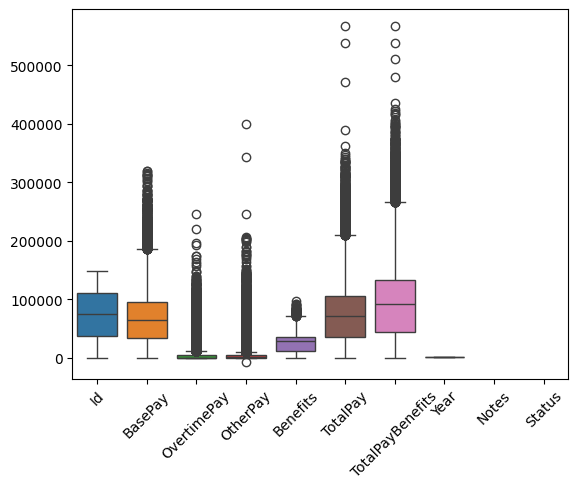

In [ ]:
ax = sns.boxplot( data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
def outlier(column):
    q25, q50, q75 = np.percentile(column, [25, 50, 75])
    iqr = q75 - q25
    max_val = q75 + (1.5 *iqr)
    min_val = q25 - (1.5 *iqr)
    return min_val, max_val

outliers_jobtitle = []  # Initialize an empty list to store outliers

for column in df.columns:
    if df[column].dtype != "object":
        min_val, max_val = outlier(df[column])
        # Accumulate outliers in the list
        outliers_jobtitle.extend(df[df[column] > max_val]['JobTitle'])

# After the loop, calculate the value counts of outliers
hight_outliers_jobtitle_counts = pd.Series(outliers_jobtitle).value_counts()
print(hight_outliers_jobtitle_counts.head(20))


Firefighter                       3577
Transit Operator                  2670
Police Officer 3                  1784
Deputy Sheriff                    1437
Registered Nurse                  1408
Sergeant 3                        1165
FIREFIGHTER                       1124
Lieutenant, Fire Suppression       970
TRANSIT OPERATOR                   927
Police Officer 2                   926
EMT/Paramedic/Firefighter          897
Police Officer                     557
POLICE OFFICER III                 476
Electrical Transit System Mech     439
REGISTERED NURSE                   393
Transit Supervisor                 388
Inspector 3                        358
Captain, Fire Suppression          356
Patient Care Assistant             325
Stationary Engineer                284
dtype: int64


In [ ]:
outliers_jobtitle2 = []
for column in df.columns:
    if df[column].dtype != "object":
        min_val, max_val = outlier(df[column])

        outliers_jobtitle2.extend(df[df[column] < min_val]['JobTitle'])

low_outliers_jobtitle_counts = pd.Series(outliers_jobtitle2).value_counts()
print(low_outliers_jobtitle_counts.head(20))

IS Business Analyst-Principal    1
dtype: int64


In [ ]:
for column in df.columns:
    if df[column].dtype != "object":
        min_val, max_val = outlier(df[column])
        df[column] = np.where((df[column] > max_val) | (df[column] < min_val), np.nan, df[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  float64
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           147656 non-null  float64
 4   OvertimePay       128462 non-null  float64
 5   OtherPay          133472 non-null  float64
 6   Benefits          148640 non-null  float64
 7   TotalPay          148314 non-null  float64
 8   TotalPayBenefits  148532 non-null  float64
 9   Year              148650 non-null  float64
 10  Agency            148650 non-null  object 
dtypes: float64(8), object(3)
memory usage: 13.6+ MB


In [ ]:
df.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               994
OvertimePay         20188
OtherPay            15178
Benefits               10
TotalPay              336
TotalPayBenefits      118
Year                    0
Agency                  0
dtype: int64

In [ ]:
df=df.drop(["Status" ,"Notes"] , axis=1)


In [ ]:
filt = (df['OvertimePay'].isna()) & (df['OtherPay'].isna())
df[filt]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647.0,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014.0,San Francisco
148650,148651.0,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014.0,San Francisco
148651,148652.0,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014.0,San Francisco
148652,148653.0,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014.0,San Francisco


In [ ]:
df.drop(df[filt].index, inplace=True)


In [ ]:
df.Agency.value_counts()

San Francisco    148650
Name: Agency, dtype: int64

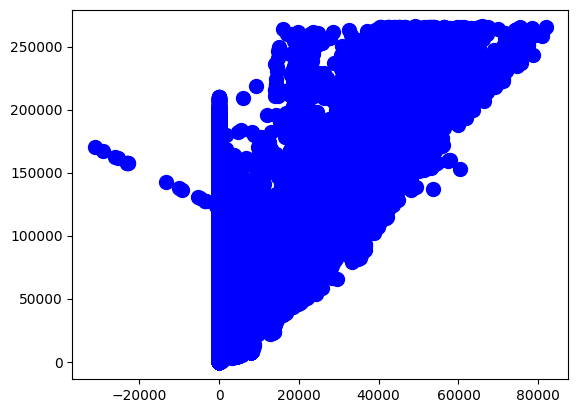

In [ ]:
plt.scatter(df.Benefits, df.TotalPayBenefits, marker='o', color='blue', s=100, label='Data Points')
plt.show()

<ipython-input-67-f8c88a0f9e6f>:1: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



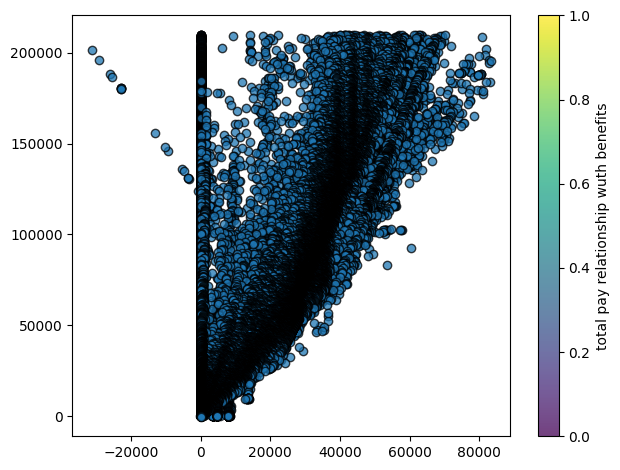

In [ ]:
plt.scatter(df['Benefits'], df['TotalPay'], cmap='Purples', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('total pay relationship wuth benefits')

plt.tight_layout()
plt.show()

<ipython-input-68-d7d1035d2a1b>:1: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



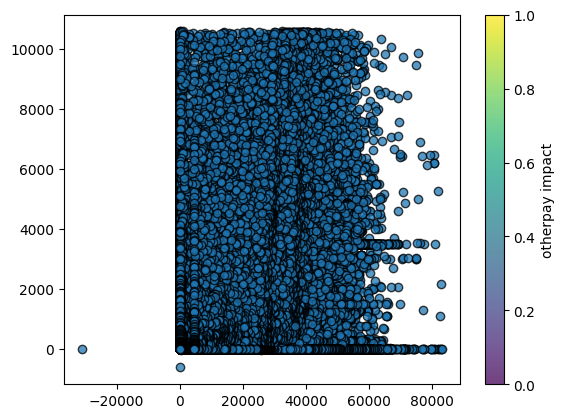

In [ ]:
plt.scatter(df['Benefits'],df['OtherPay'] ,cmap='summer', edgecolor='black' ,linewidth=1,alpha =0.75)
cbar=plt.colorbar()
cbar.set_label('otherpay impact')

<ipython-input-69-7bcaa057b2a7>:1: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



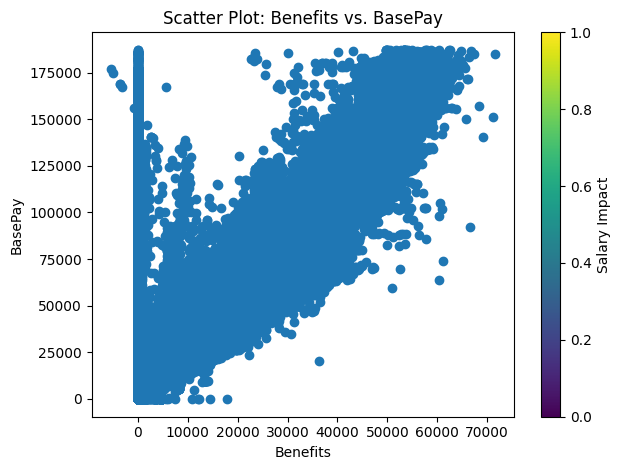

In [ ]:
plt.scatter(df['Benefits'], df['BasePay'], cmap='Greens')

cbar = plt.colorbar()
cbar.set_label('Salary Impact')

plt.xlabel('Benefits')
plt.ylabel('BasePay')
plt.title('Scatter Plot: Benefits vs. BasePay')

plt.tight_layout()
plt.show()

<ipython-input-70-3bf9a2202d30>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



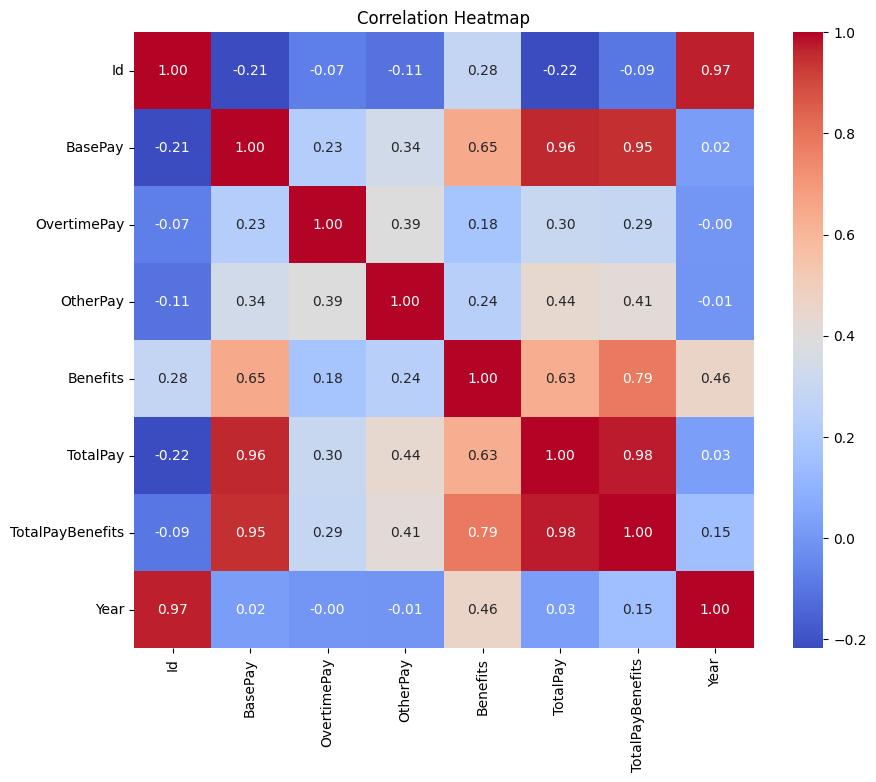

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
missing = df.loc[:, ["Benefits", "BasePay" ,"TotalPay","TotalPayBenefits" ,"OvertimePay","OtherPay"]]

df_mice=df.copy()
mice=IterativeImputer(random_state=101 ,max_iter=20) #becouse there is a correlation between variables i used mice algorithm (iterative imputer) that is based on regresion model
df_imputed = mice.fit_transform(missing)
df.loc[:, ["Benefits", "BasePay","TotalPay","TotalPayBenefits","OvertimePay","OtherPay"]] = df_imputed

df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

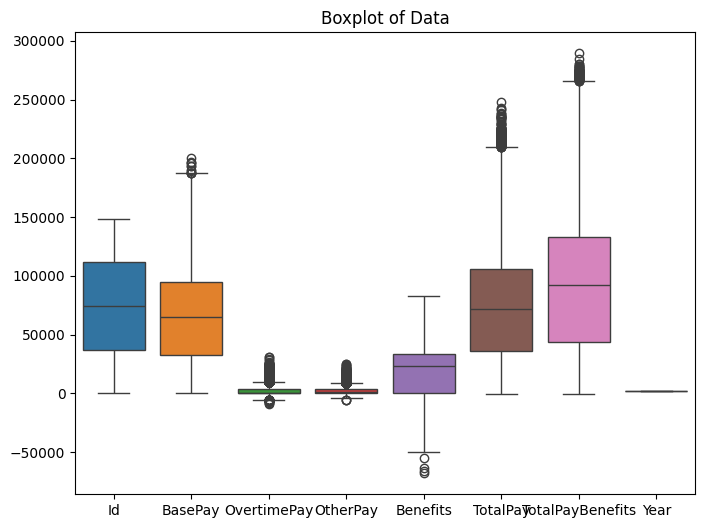

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Data')
plt.show()

In [ ]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,74325.500047,65752.201822,2171.427674,2194.077672,18947.609272,74104.301477,93051.910658,2012.522603
std,42911.703176,41894.269835,3343.307800,2891.181876,17166.913094,48914.275670,61240.725133,1.117526
min,1.000000,-166.010000,-8766.210132,-5823.069504,-67945.006027,-618.130000,-618.130000,2011.000000
25%,37163.250000,32834.607500,0.000000,0.000000,0.001095,36169.955000,44073.337500,2012.000000
50%,74325.500000,64869.645000,0.000000,784.960000,23296.305000,71427.240000,92406.020000,2013.000000
75%,111487.750000,94598.295000,3827.786533,3679.283553,33485.257500,105691.292500,132780.887500,2014.000000
max,148654.000000,200526.688677,31158.623542,25063.451133,83277.340000,248074.017990,289352.894307,2014.000000


In [ ]:
negative_payment=df['BasePay'] < 0
df[negative_payment]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
72832,72833.0,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012.0,San Francisco
72865,72866.0,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012.0,San Francisco
72872,72873.0,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012.0,San Francisco
72874,72875.0,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012.0,San Francisco
72878,72879.0,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012.0,San Francisco
72884,72885.0,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012.0,San Francisco
72888,72889.0,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012.0,San Francisco
72894,72895.0,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012.0,San Francisco
72908,72909.0,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012.0,San Francisco
72920,72921.0,Charles Williams,Junior Clerk,-30.58,45.87,0.0,1.36,15.29,16.65,2012.0,San Francisco


In [ ]:
df[negative_payment]["JobTitle"].value_counts()

Junior Clerk    10
Clerk            1
Name: JobTitle, dtype: int64

In [ ]:
df[df['JobTitle']=="Junior Clerk"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
61820,61821.0,Eddy Redondo,Junior Clerk,45263.51,0.00,623.4,25868.05,45886.91,71754.96,2012.0,San Francisco
61839,61840.0,Enrico Intal,Junior Clerk,45263.50,0.00,624.0,25750.42,45887.50,71637.92,2012.0,San Francisco
62611,62612.0,Sonia Coronado-Brown,Junior Clerk,36531.24,4071.76,960.0,23017.81,41563.00,64580.81,2012.0,San Francisco
62657,62658.0,Milton Martin,Junior Clerk,39909.50,0.00,0.0,24267.67,39909.50,64177.17,2012.0,San Francisco
63145,63146.0,Vladimir Vallejo,Junior Clerk,38201.57,0.00,0.0,20574.26,38201.57,58775.83,2012.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148285,148286.0,Greg K Hansen,Junior Clerk,156.50,249.42,0.0,4.06,405.92,409.98,2014.0,San Francisco
148300,148301.0,Julien N Heng,Junior Clerk,152.00,228.00,0.0,3.80,380.00,383.80,2014.0,San Francisco
148307,148308.0,Fernando Rodriguez,Junior Clerk,371.69,0.00,0.0,3.72,371.69,375.41,2014.0,San Francisco
148386,148387.0,Michael Brito,Junior Clerk,156.50,102.70,0.0,2.59,259.20,261.79,2014.0,San Francisco


In [ ]:
#inconcectent data droping
df.drop(df[negative_payment].index, inplace=True)


In [ ]:
df[df['TotalPay'] < 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,148654.0,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014.0,San Francisco


In [ ]:
df.drop(df[df['TotalPay'] < 0].index, inplace=True)


Text(0, 0.5, 'total')

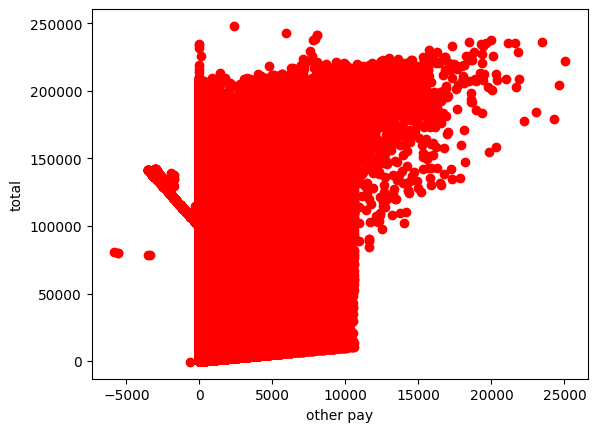

In [ ]:
plt.scatter(df.OtherPay, df.TotalPay, marker='o', color='red', label='Data Points')
plt.xlabel('other pay')
plt.ylabel('total pay')


In [ ]:
df[df['OtherPay'] < 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1.0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.000000,-2023.225958,-3251.956813,130519.706242,127267.747382,2011.0,San Francisco
1,2.0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,-4805.715872,-1982.838311,-743.600406,124149.498752,123405.896520,2011.0,San Francisco
8,9.0,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,-6420.850607,-2948.340600,-5338.709221,135819.210645,130480.499193,2011.0,San Francisco
14,15.0,DAVID FRANKLIN,"BATTALION CHIEF, (FIRE DEPARTMENT)",174872.64,-6262.161340,-2853.478638,-4887.233296,134672.644985,129785.409497,2011.0,San Francisco
17,18.0,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.87,-3617.922858,-1272.794221,2635.707851,115567.426958,118203.133280,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
110830,110831.0,Patricia A Coggan,Nurse Manager,171337.50,0.000000,-2396.623344,55954.550000,133381.320328,189335.864281,2014.0,San Francisco
110831,110832.0,Murray P Daggs,Police Officer 3,118898.13,-1568.773114,-362.821957,38833.080000,103828.620246,142661.696954,2014.0,San Francisco
110834,110835.0,John D Cavanaugh,"Captain, Emergency Med Svcs",148121.08,-3578.227035,-1750.206368,51262.920000,120357.190424,171620.106039,2014.0,San Francisco
110837,110838.0,Damon M Hart,Sergeant 3,137982.12,-8766.210132,-5823.069504,42834.490000,80476.473607,123310.962714,2014.0,San Francisco


<Axes: ylabel='Frequency'>

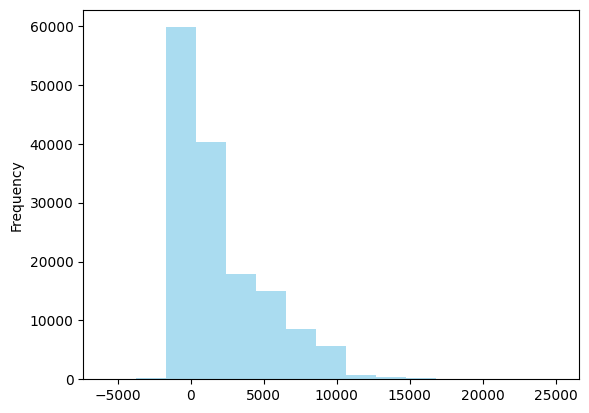

In [ ]:
df['OtherPay'].plot.hist(bins=15, color='skyblue', alpha=0.7)
#negative values might show other pays that was taken from employee like Discounts and posetive value for rewards

In [ ]:
Non_permanent_employee =df[df['BasePay']==0]

Text(0.5, 1.0, 'Non_permanent_employee payment')

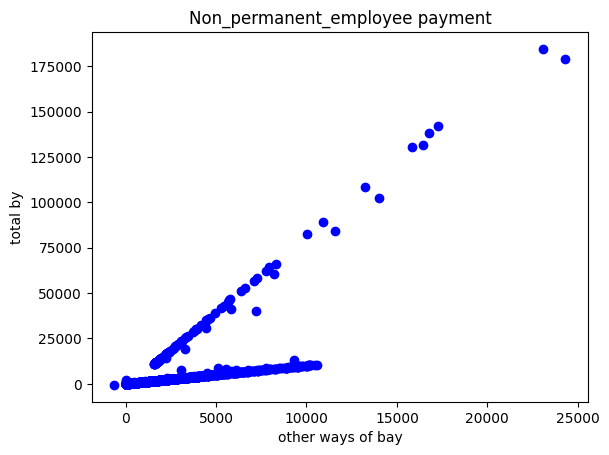

In [ ]:
plt.scatter(Non_permanent_employee.OtherPay, Non_permanent_employee.TotalPay, marker='o', color='blue', label='Data Points')
plt.xlabel('other ways of bay')
plt.ylabel('total by')
plt.title('Non_permanent_employee payment')

Text(0.5, 1.0, 'Non_permanent_employee overtime payment')

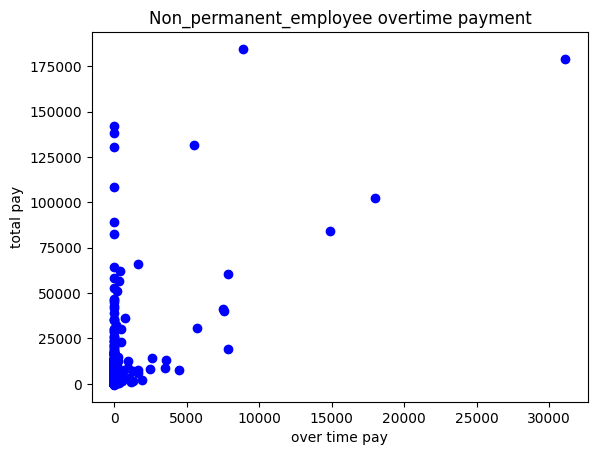

In [ ]:
plt.scatter(Non_permanent_employee.OvertimePay, Non_permanent_employee.TotalPay, marker='o', color='blue', label='Data Points')
plt.xlabel('over time pay')
plt.ylabel('total pay')
plt.title('Non_permanent_employee overtime payment')

Text(0.5, 1.0, 'unemployee benefits state')

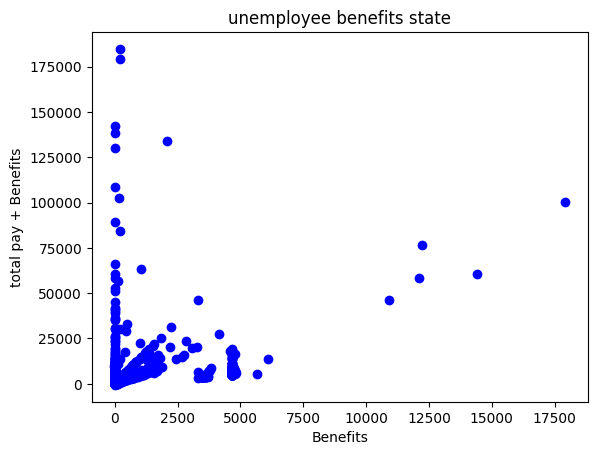

In [ ]:
plt.scatter(Non_permanent_employee.Benefits, Non_permanent_employee.TotalPayBenefits, marker='o', color='blue', label='Data Points')
plt.xlabel('Benefits')
plt.ylabel('total pay + Benefits')
plt.title('unemployee benefits state')

In [ ]:
Non_permanent_employee[Non_permanent_employee['Benefits']<0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
2896,2897.0,JOHN PAYNE,MANAGER VII,0.0,0.00,17256.016323,-0.003125,142245.22,142245.22,2011.0,San Francisco
3263,3264.0,LAWRENCE BADINER,MANAGER VI,0.0,0.00,16772.771069,-0.003039,138191.99,138191.99,2011.0,San Francisco
19058,19059.0,PETER LEONARD,FIRE FIGHTER PARAMEDIC,0.0,1630.20,8303.628768,-0.001520,65986.23,65986.23,2011.0,San Francisco
20834,20835.0,MICHAEL COLLINS,POLICE OFFICER II,0.0,7815.78,8195.394593,-0.001407,60636.55,60636.55,2011.0,San Francisco
21658,21659.0,LINDA ZIMMERMAN,PUBLIC HEALTH NURSE,0.0,0.00,7264.552308,-0.001361,58441.60,58441.60,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
36155,36156.0,JOE BROWN JR,TRANSIT OPERATOR,0.0,0.00,0.300000,-0.000131,0.30,0.30,2011.0,San Francisco
36156,36157.0,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.00,0.000000,-0.000131,0.00,0.00,2011.0,San Francisco
36157,36158.0,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.00,0.000000,-0.000131,0.00,0.00,2011.0,San Francisco
36158,36159.0,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.00,0.000000,-0.000131,0.00,0.00,2011.0,San Francisco


In [ ]:
negative_Benefits=df[df['Benefits'] < 0]
#Negative reimbursement happens when the beneficiary cost sharing, such as coinsurance and/or deductible, exceeds the reimbursement due to the provider.

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1.0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.180000,0.000000,-2023.225958,-3251.956813,130519.706242,127267.747382,2011.0,San Francisco
1,2.0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.020000,-4805.715872,-1982.838311,-743.600406,124149.498752,123405.896520,2011.0,San Francisco
2,3.0,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),123091.711463,6058.607591,6290.772861,-13186.169509,155748.575616,142562.403184,2011.0,San Francisco
7,8.0,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,140226.845093,0.000000,6897.212640,-22793.802931,180148.066145,157354.259443,2011.0,San Francisco
8,9.0,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.640000,-6420.850607,-2948.340600,-5338.709221,135819.210645,130480.499193,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
110533,110534.0,William J Coaker Jr.,Chief Investment Officer,136485.756195,0.000000,7667.252515,-50190.853783,182107.944465,131917.090081,2014.0,San Francisco
110534,110535.0,Gregory P Suhr,Chief of Police,154695.063942,0.000000,9122.559204,-67945.006027,209900.885615,141955.878856,2014.0,San Francisco
110535,110536.0,Joanne M Hayes-White,"Chief, Fire Department",152730.276536,0.000000,8965.531364,-66029.329978,206902.022533,140872.691838,2014.0,San Francisco
110541,110542.0,Edward D Reiskin,"Gen Mgr, Public Trnsp Dept",149715.512779,0.000000,0.000000,-63089.922534,202300.576237,139210.653007,2014.0,San Francisco


Text(0.5, 1.0, 'pay-benefits relation')

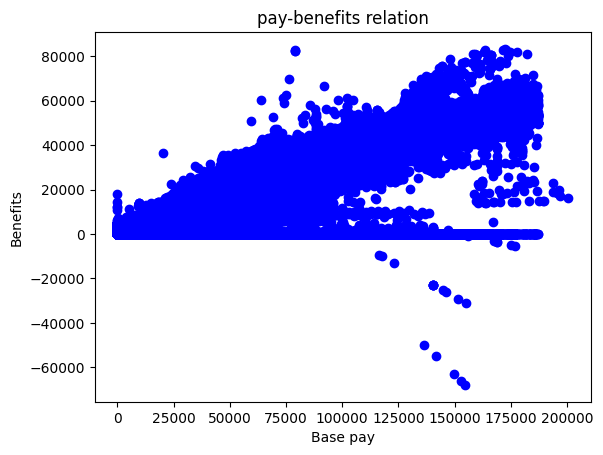

In [ ]:
plt.scatter(df.BasePay, df.Benefits, marker='o', color='blue', label='Data Points')
plt.xlabel('Base pay')
plt.ylabel('Benefits')
plt.title('pay-benefits relation')


In [ ]:
negative_overtime=df['OvertimePay'] <0
df[negative_overtime ]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
1,2.0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,-4805.715872,-1982.838311,-743.600406,124149.498752,123405.896520,2011.0,San Francisco
8,9.0,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,-6420.850607,-2948.340600,-5338.709221,135819.210645,130480.499193,2011.0,San Francisco
11,12.0,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,-473.035146,607.170477,11583.011708,92844.905590,104427.916559,2011.0,San Francisco
14,15.0,DAVID FRANKLIN,"BATTALION CHIEF, (FIRE DEPARTMENT)",174872.64,-6262.161340,-2853.478638,-4887.233296,134672.644985,129785.409497,2011.0,San Francisco
17,18.0,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.87,-3617.922858,-1272.794221,2635.707851,115567.426958,118203.133280,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
110824,110825.0,Domenico A Discenza,Sergeant 3,137982.08,-2938.694282,-1263.406697,42824.900000,114537.280863,157362.176226,2014.0,San Francisco
110829,110830.0,Robert J Lopez,"Lieutenant, Fire Suppression",131080.06,-2409.924750,-940.840290,43765.080000,110713.591574,154478.667789,2014.0,San Francisco
110831,110832.0,Murray P Daggs,Police Officer 3,118898.13,-1568.773114,-362.821957,38833.080000,103828.620246,142661.696954,2014.0,San Francisco
110834,110835.0,John D Cavanaugh,"Captain, Emergency Med Svcs",148121.08,-3578.227035,-1750.206368,51262.920000,120357.190424,171620.106039,2014.0,San Francisco


<Axes: ylabel='Frequency'>

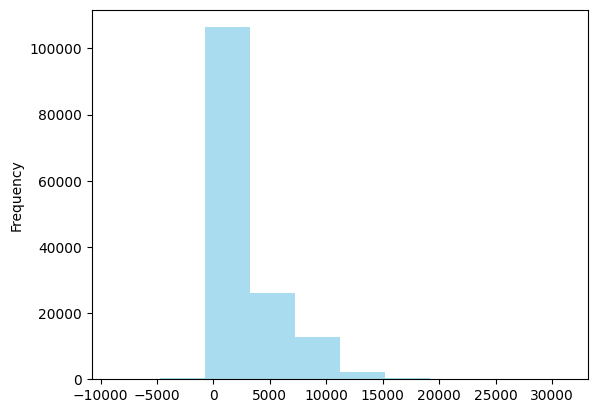

In [ ]:
df['OvertimePay'].plot.hist(bins=10, color='skyblue', alpha=0.7)


In [ ]:
df[negative_overtime]['JobTitle'].value_counts()

Lieutenant, Fire Suppression             66
Battalion Chief, Fire Suppress           55
Captain, Fire Suppression                55
EMT/Paramedic/Firefighter                53
Firefighter                              53
Battlion Chief, Fire Suppressi           23
Captain, Emergency Med Svcs              18
Sergeant 3                               17
Inspector 3                               8
Lieutenant 3                              7
Police Officer 3                          6
Lieut,Fire Prev                           6
Capt,Fire Prev or Fire Invsgtn            5
Incident Support Specialist               4
BATTALION CHIEF, (FIRE DEPARTMENT)        4
Nurse Practitioner                        2
Police Officer 2                          2
CAPTAIN III (POLICE DEPARTMENT)           2
CAPTAIN, FIRE SUPPRESSION                 2
Assistant Deputy Chief 2                  1
Electronic Maintenance Tech               1
Marine Engineer of Fire Boats             1
Assistant Inspector 3           

In [ ]:
df.drop(df[negative_overtime].index, inplace=True)


<ipython-input-152-80685a3eb8eb>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Bar Chart of Salaries')

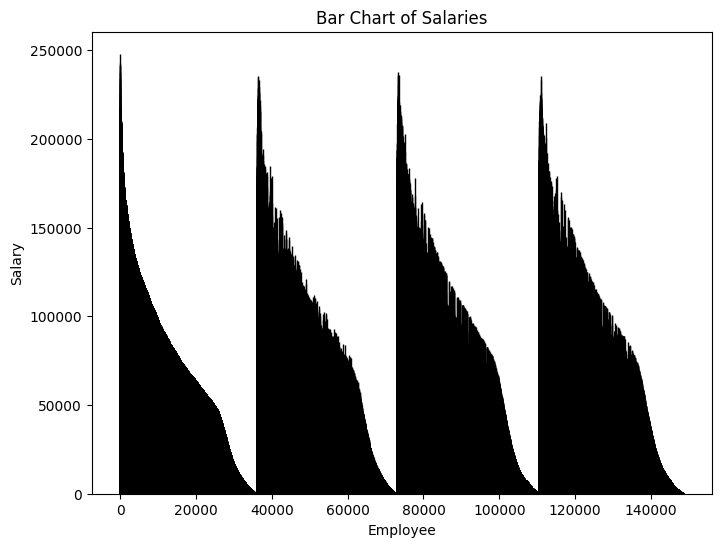

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(df.TotalPay)), df.TotalPay, color='skyblue', edgecolor='black')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.title('Bar Chart of Salaries')


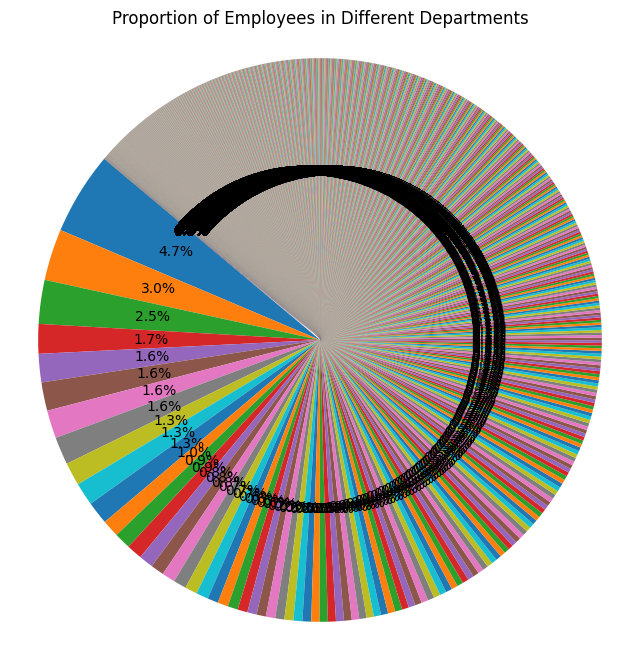

In [ ]:
departments = df.JobTitle
num_employees = df.JobTitle.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(num_employees, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.axis('equal')
plt.show()

In [ ]:
df.groupby('Year')


In [ ]:
summary_stats = df.groupby('Year')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max'])
print(summary_stats)


        count          mean     median  min            max
Year                                                      
2011.0  36159  71491.665179  68213.240  0.0  248074.017990
2012.0  36755  73497.978837  70730.840  0.0  235567.329052
2013.0  37606  76587.586982  74493.900  0.0  237663.059006
2014.0  38118  74740.710988  72367.365  0.0  235345.228702


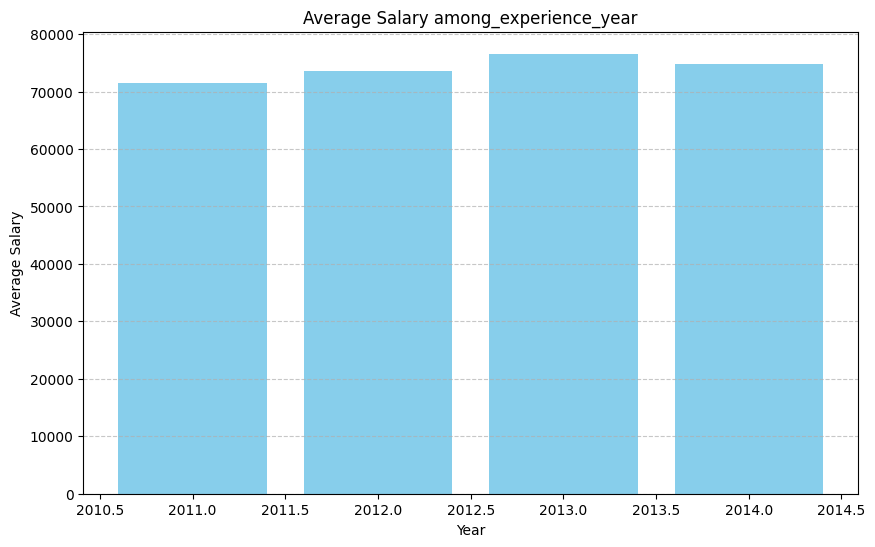

In [ ]:
avg_salary_among_experience_year = df.groupby('Year')['TotalPay'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_salary_among_experience_year['Year'], avg_salary_among_experience_year['TotalPay'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary among_experience_year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148638.000000,148638.000000,148638.000000,148638.000000,148638.000000,148638.000000,148638.000000,148638.000000
mean,74325.106500,65757.516665,2171.593271,2194.258965,18949.138691,74110.285060,93059.423661,2012.522632
std,42913.000486,41891.784682,3343.391897,2891.227764,17166.762115,48911.716484,61237.488336,1.117556
min,1.000000,0.000000,-8766.210132,-5823.069504,-67945.006027,0.000000,-33.890000,2011.000000
25%,37160.250000,32846.935000,0.000000,0.000000,0.001095,36178.340000,44097.540000,2012.000000
50%,74330.500000,64873.275000,0.000000,785.485000,23305.395000,71429.665000,92410.035000,2013.000000
75%,111489.750000,94602.280000,3828.345115,3679.475000,33485.420000,105694.032500,132787.170000,2014.000000
max,148650.000000,200526.688677,31158.623542,25063.451133,83277.340000,248074.017990,289352.894307,2014.000000


Text(0.5, 1.0, 'base payment distripution')

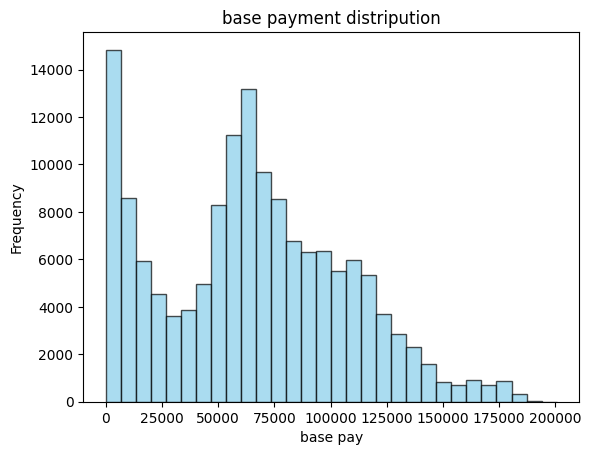

In [ ]:
plt.hist(df.BasePay, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('base pay')
plt.ylabel('Frequency')
plt.title('base payment distripution')

Text(0.5, 1.0, 'total payment distripution')

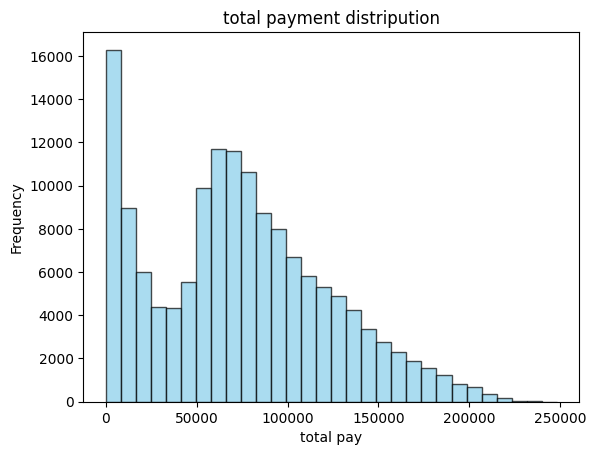

In [ ]:
plt.hist(df.TotalPay, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('total pay')
plt.ylabel('Frequency')
plt.title('total payment distripution')

Text(0.5, 1.0, 'total payment with Benefits distripution')

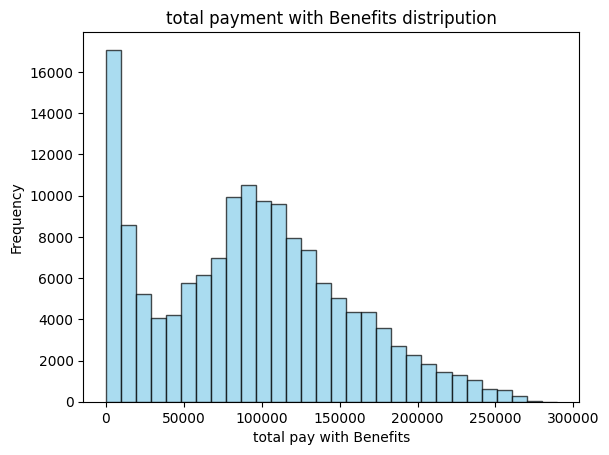

In [ ]:
plt.hist(df.TotalPayBenefits, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('total pay with Benefits')
plt.ylabel('Frequency')
plt.title('total payment with Benefits distripution')

In [ ]:
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000]
group_names=[">=25000",">=50000" ,">=75000",">=100000" ," >=125000",">=150000" ,">=175000",">=200000",">=225000",">=250000"]
df['salaries']=pd.cut(df['TotalPay'] , bins ,labels=group_names)


In [ ]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,salaries
0,1.0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.180000,0.000000,-2023.225958,-3251.956813,130519.706242,127267.747382,2011.0,San Francisco,>=150000
2,3.0,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),123091.711463,6058.607591,6290.772861,-13186.169509,155748.575616,142562.403184,2011.0,San Francisco,>=175000
3,4.0,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.000000,1206.760074,1611.325792,16362.081621,80708.007151,97070.088455,2011.0,San Francisco,>=100000
4,5.0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.600000,9737.000000,112.874177,3982.524092,112147.060184,116129.582867,2011.0,San Francisco,>=125000
5,6.0,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.000000,8601.000000,639.022676,7445.212939,103353.235523,110798.447358,2011.0,San Francisco,>=125000
...,...,...,...,...,...,...,...,...,...,...,...,...
148644,148645.0,Randy D Winn,"Stationary Eng, Sewage Plant",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.0,San Francisco,NaN
148645,148646.0,Carolyn A Wilson,Human Services Technician,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.0,San Francisco,NaN
148647,148648.0,Joann Anderson,Communications Dispatcher 2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.0,San Francisco,NaN
148648,148649.0,Leon Walker,Custodian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.0,San Francisco,NaN


In [ ]:
groups_jobs=df.groupby("salaries")['JobTitle'].value_counts()
print(groups_jobs)

salaries  JobTitle                    
>=25000   Special Nurse                   2461
          Public Svc Aide-Public Works    2453
          Recreation Leader               1962
          Public Service Trainee          1216
          Transit Operator                1037
                                          ... 
>=250000  Commander 3                        1
          Deputy Chief 3                     1
          EXECUTIVE CONTRACT EMPLOYEE        1
          MAYOR                              1
          Manager I                          1
Name: JobTitle, Length: 6773, dtype: int64


In [ ]:
for i in range(25000, 250001, 25000):

   jobs_of_salary_group =df[df['TotalPay'] < i]["JobTitle"].value_counts()
   print(f"jobs of salary group :\n {jobs_of_salary_group}")
   print("==========================")

jobs of salary group :
 Special Nurse                     2464
Public Svc Aide-Public Works      2455
Recreation Leader                 1965
Public Service Trainee            1217
Transit Operator                  1079
                                  ... 
Curator 3                            1
IS Prg Analyst-Principal             1
Rehabilitation Counselor             1
Investigator/Transit Fare Supv       1
Airport Economic Planner             1
Name: JobTitle, Length: 1167, dtype: int64
jobs of salary group :
 Special Nurse                        3335
Public Svc Aide-Public Works         2518
Recreation Leader                    1971
Transit Operator                     1866
Public Service Trainee               1315
                                     ... 
CUSTOMER SERVICE AGENT SUPERVISOR       1
BARBER                                  1
NURSE MANAGER                           1
MAYORAL STAFF XI                        1
Airport Economic Planner                1
Name: JobTitle, Le

In [ ]:
#Summary of Insights
""" TotalPay = BasePay+OvertimePay+OtherPay
    TotalPayBenefits = Totalpay + Benefits
    BasePay is posetivly correlated to TotalPay
    OvertimePay is posetivly correlated to TotalPay
    OtherPay is posetivly correlated to TotalPay
    Benefits is posetivly correlated to TotalPayBenefits

    OvertimePay is the payment for extra time working
    base bay is the reglar payment withput any extra
    OtherPay is other ways of payment like rewards and (Discounts / Discounts) in case of negative numbers
    Benefits can be negative for beneficiary cost sharing, such as coinsurance and/or deductible, exceeds the reimbursement due to the provider.

    some employee are not Permanent employees with a base pay but they have OvertimePay and OtherPay
    most people salary is <25000 where is salary is stating to be normally distriputed among people with salary > 25000

    #side note : blease accept me i truly want to learn """

